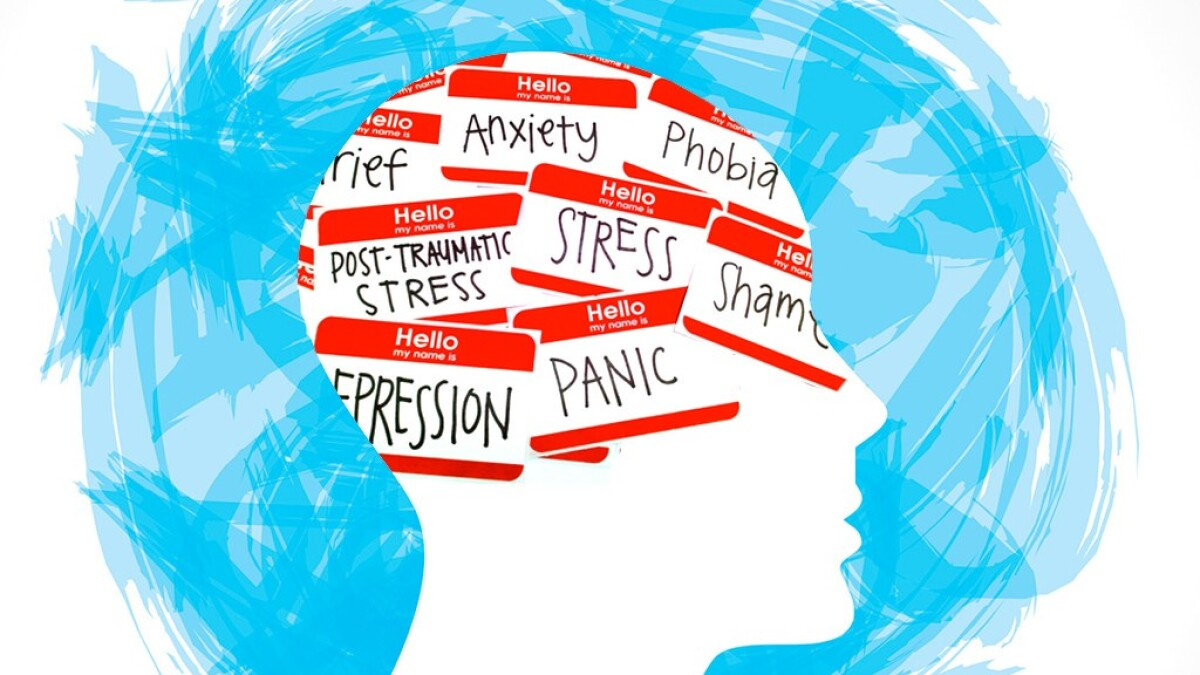


<p style="text-align:center;"><span style="font-size:48px;"><span style="color:crimson;"><span style="font-family:cursive;"> Hello everyone! </span> </span>  </span></p>

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">What is mental health?
Mental health includes our emotional, psychological, and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make healthy choices.1 Mental health is important at every stage of life, from childhood and adolescence through adulthood.

</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">Why is mental health important for overall health?
    Mental and physical health are equally important components of overall health.  For example, depression increases the risk for many types of physical health problems, particularly long-lasting conditions like diabetes, heart disease, and stroke. Similarly, the presence of chronic conditions can increase the risk for mental illness.

</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">In this notebook, I intend to perform analysis among different datasets. First, we will have a comprehensive analysis of the data using the Plotly library. Then, with the regression algorithm, we consider one of the variables as a target and model it. Of course, it is better to use clustering in this data, which I will do in the next notebook.

</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:white;">Well, let's get started.
</p>
</div>

# 1- Import Libraries

In [ ]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 2- Call Datasets

In [ ]:
Data1 = pd.read_csv("/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("/kaggle/input/mental-health/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("/kaggle/input/mental-health/6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("/kaggle/input/mental-health/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [ ]:
df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

# 3- Functional Describe of All Datasets

In [ ]:
def describe(df):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

In [ ]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 4- Output of Describes

In [ ]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df1 : Mental illness dataframe"' + color.END)
print(describe(df1))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df2 : Adult population, mental illnesses"' + color.END)
print(describe(df2))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df3 : Depressive"' + color.END)
print(describe(df3))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df4 : Number of countries"' + color.END)
print(describe(df4))

# 5- Some Visualizations with Plotly

In [ ]:
df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

In [ ]:
df2.sort_values(by= "Eating disorders" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Eating disorders", y="Entity", orientation='h',color='Dysthymia')
fig.show()

In [ ]:
df2.replace(to_replace="<0.1", value=0.1, regex=True, inplace=True)

In [ ]:
df2['Schizophrenia'] = df2['Schizophrenia'].astype(float)

In [ ]:
df2.sort_values(by= "Schizophrenia" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Schizophrenia", y="Entity", orientation='h',color='Anxiety disorders')
fig.show()

# 6- Amazing Dynamik Subplot with Plotly and go

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x1 = ["Andean Latin America", "West Sub-Saharan Africa", "Tropical Latin America", "Central Asia", "Central Europe",
    "Central Sub-Saharan Africa", "Southern Latin America", "North Africa/Middle East", "Southern Sub-Saharan Africa",
    "Southeast Asia", "Oceania", "Central Latin America", "Eastern Europe", "South Asia", "East Sub-Saharan Africa",
    "Western Europe", "World", "East Asia", "Caribbean", "Asia Pacific", "Australasia", "North America"]

fig.append_trace(go.Bar(
    x=df2["Bipolar disorder"],
    y=x1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(20, 10, 56, 1.0)',
            width=0),
    ),
    name='Bipolar disorder in Mental Health',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=df2["Major depression"], y=x1,
    mode='lines+markers',
    line_color='rgb(40, 0, 128)',
    name='Major depression in Mental Health',
), 1, 2)

fig.update_layout(
    title='Major depression and Bipolar disorder',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=5,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.45],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=10000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd in zip(df2["Major depression"], df2["Bipolar disorder"], x1):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+10,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+10 ,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=10,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Mental health visualization",
                        font=dict(family='Arial', size=20, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

# 7- Multiple Analysis

In [ ]:
x = ["Appetite change", "Average across symptoms", "Depressed mood", "Difficulty concentrating", "Loss of interest",
    "Low energy", "Low self-esteem", "Psychomotor agitation", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df3["Nearly every day"], name='Nearly every day',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["More than half the days"], name = 'More than half the days',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=x, y=df3["Several days"], name='Several days',
                         line=dict(color='black', width=4,
                              dash='dashdot') # dash options include 'dash', 'dot', and 'dashdot'
))

# Edit the layout
fig.update_layout(title='Depressive symptoms across us population',
                   xaxis_title='Entity',
                   yaxis_title='Types of days')


fig.show()

In [ ]:
x = ["Alcohol use disorders", "Amphetamine use disorders", "Anorexia nervosa", "Anxiety disorders",
     "Attention-deficit hyperactivity disorder", "Autism spectrum disorders", "Bipolar disorder",
     "Bulimia nervosa", "Cannabis use disorders", "Cocaine use disorders", "Dysthymia","Major depressive disorder",
    "Opioid use disorders", "Other drug use disorders", "Personality disorders"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=df4["Number of countries with primary data on prevalence of mental disorders"],
                         name='Nearly every day',
                         line=dict(color='firebrick', width=4)))


# Edit the layout
fig.update_layout(title='mental illnesses in the global burden of disease study',
                   xaxis_title='illnesses',
                   yaxis_title='Number of countries')


fig.show()

# 8- Rename Columns

In [ ]:
df1_column_names = list(df1.columns.values)
df1_column_names

In [ ]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [ ]:
df1

In [ ]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [ ]:
df1_variables

# 9- Correlation

In [ ]:
Corrmat = df1_variables.corr()

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

# 10- Scatter and Box plot

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize= (15,10))

ax1.set_title('Schizophrenia - Eating')
sns.scatterplot(x="Schizophrenia disorders", y="Eating disorders", data=df1_variables, ax=ax1)

ax2.set_title('Depressive - Eating')
sns.scatterplot(x='Depressive disorders', y="Eating disorders", data=df1_variables, ax=ax2)

ax3.set_title('Anxiety - Eating')
sns.scatterplot(x='Anxiety disorders', y="Eating disorders", data=df1_variables, ax=ax3)

ax4.set_title('Bipolar - Eating')
sns.scatterplot(x='Bipolar disorders', y="Eating disorders", data=df1_variables, ax=ax4)

plt.tight_layout()

In [ ]:
Numerical = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders','Eating disorders']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = df1_variables)
    i += 1
    plt.show()

Creat model

# 11- Normalize

In [ ]:
features = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders']
X_model = df1[features]
y_model = df1["Eating disorders"]

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_model_norm = scaler.fit_transform(X_model)

In [ ]:
X_model_norm

# 12- Simple Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model_norm, y_model, test_size=20, random_state=42)

In [ ]:
print("Shape of x_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

In [ ]:
Model = LinearRegression()
Model.fit(X_train, y_train)

In [ ]:
y_pred = Model.predict(X_test)

In [ ]:
print("Mean Absolute Error of Model is: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error of Model is: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared of Model is: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score of Model is: ", metrics.r2_score(y_test,y_pred))

In [ ]:
k_fold = KFold(10)
print (cross_val_score(Model, X_model_norm, y_model.ravel(), cv=k_fold, n_jobs=1))

# 13- Higher Dimension Linear Regression

In [ ]:
def check(Dimension, testsize):
    r2 = 0.6289
    for column in X_model:
        New_Col_name = column + str(Dimension)
        New_Col_value = X_model[column]**Dimension
        X_model.insert(0, New_Col_name, New_Col_value)
        X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=testsize,random_state=0)
        New_model = LinearRegression()
        New_model.fit(X_train, y_train)
        y_pred = New_model.predict (X_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            X_model.drop([New_Col_name], axis=1, inplace=True)
        else:
            r2 = r2_new
            
    print("R2 score is: ", r2)
check(2,0.2)

In [ ]:
X_model

# 14- Dot Model

In [ ]:
Bipolar_Anx = X_model["Bipolar disorders"]*X_model["Anxiety disorders"]
Bipolar_Anx2 = X_model["Bipolar disorders2"]*X_model["Anxiety disorders2"]
Dep_Schi = X_model["Depressive disorders"]* X_model["Schizophrenia disorders"]
Dep_Schi2 = X_model["Depressive disorders2"]* X_model["Schizophrenia disorders2"]

In [ ]:
X_model.insert(0, "Bipolar_Anx", Bipolar_Anx)
X_model.insert(0, "Bipolar_Anx2", Bipolar_Anx2)
X_model.insert(0, "Dep_Schi", Dep_Schi)
X_model.insert(0, "Dep_Schi2", Dep_Schi2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=0.2,random_state=0)
Model = LinearRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
r2

# 15- Display Model's Output

In [ ]:
a = X_test["Bipolar disorders"]
b = y_test
c = X_test["Bipolar disorders"]
d = y_pred

In [ ]:
font1 = {'family':'fantasy','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
font3 = {'family':'cursive','color':'green','size':20}

In [ ]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Bipolar Prediction",fontdict=font2)
plt.xlabel("Bipolar",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b, color = 'blue', label = "Real Values")
plt.scatter(c,d, color = 'maroon', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:
a1 = X_test["Schizophrenia disorders"]
b1 = y_test
c1 = X_test["Schizophrenia disorders"]
d1 = y_pred

In [ ]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Schizophrenia Prediction",fontdict=font2)
plt.xlabel("Schizophrenia",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a1,b1, color = 'blue', label = "Real Values")
plt.scatter(c1,d1, color = 'Orange', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:
a2 = X_test["Anxiety disorders"]
b2 = y_test
c2 = X_test["Anxiety disorders"]
d2 = y_pred

In [ ]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Anxiety Prediction",fontdict=font2)
plt.xlabel("Anxiety",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a2,b2, color = 'blue', label = "Real Values")
plt.scatter(c2,d2, color = 'indigo', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:
a3 = X_test["Depressive disorders"]
b3 = y_test
c3 = X_test["Depressive disorders"]
d3 = y_pred

In [ ]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Depressive Prediction",fontdict=font2)
plt.xlabel("Depressive",fontdict= font3)
plt.ylabel("Eating",fontdict=font1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a3,b3, color = 'blue', label = "Real Values")
plt.scatter(c3,d3, color = 'green', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

# 16- Conclusion

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#5642C5;
           font-size:120%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 50px;
              color:white;">As we have seen, the maximum regression accuracy for this model was almost 70%. Since correlation between variables is very important in a regression project, perhaps the required correlation was not present in this dataset. I think the use of clustering and PCA or even SOM can give a good result in this data set.
thank you for your attention.
If this notebook was useful for you, please vote for this notebook. Good luck✔

</p>
</div>
